In [12]:
#!git clone https://github.com/atikul-islam-sajib/TreeBasedModel.git

In [1]:
%cd TreeBasedModel

/home/shk/atikul/CustomRF/TreeBasedModel


In [ ]:
!pip install shap

In [ ]:
!pip install -e .

### Task ?

specified that I do not intend to optimize the parameter \( k \) this time, but rather to document the results for each value of \( k \). Specifically, goal is to visualize importance measures—MDI and SHAP included—as functions of \( k \), while keeping the `max_features` parameter at its default setting. There is no need to optimize for ROC AUC scores; however, want these scores recorded for each \( k \). Furthermore, for each level of feature relevance, aim to produce a set of four plots that illustrate these metrics.

#### With K and Max Feature = Default - Custom RF

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from TreeModelsFromScratch.RandomForest import RandomForest
from utils import simulate_data_strobl
from matplotlib import pyplot as plt

def calculate_auc_roc(y_true, y_scores):
    """Calculate the AUC-ROC score."""
    return roc_auc_score(y_true, y_scores)

def evaluate_models(X_train, y_train, X_test, y_test, k_values):
    """Evaluate RandomForest models for a range of k values and record MDI, SHAP, and ROC AUC."""
    results = []
    for k in k_values:
        model = RandomForest(treetype="classification", n_trees=25, k=k, random_state=42, oob_SHAP=True)
        model.fit(X_train, y_train)
        y_scores = model.predict_proba(X_test)[:, 1]
        roc_auc = calculate_auc_roc(y_test, y_scores)
        mdi_importances = model.feature_importances_
        shap_values = np.mean(model.oob_SHAP_values, axis=0)  # Average SHAP importance per feature

        results.append({
            'k': k,
            'roc_auc': roc_auc,
            'mdi_importances': mdi_importances,
            'shap_values': shap_values
        })
    return results




In [2]:
#test run

k=10;relevance=0.15
X, y = simulate_data_strobl(n=300, relevance=relevance, seed=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForest(treetype="classification", n_trees=25, k=k, random_state=42, oob_SHAP=True)
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]
roc_auc = calculate_auc_roc(y_test, y_scores)
mdi_importances = model.feature_importances_
shap_values = np.mean(model.oob_SHAP_values, axis=0)

In [5]:
model.oob_SHAP_values.shape
shap_values
np.mean(np.abs(model.oob_SHAP_values), axis=0)

array([0.04563314, 0.1470439 , 0.01606757, 0.04522102, 0.04215435])

In [ ]:
#execute code
relevance_values = [0, 0.05, 0.1, 0.15, 0.2]
k_values = range(1, 31)
all_results = []

for relevance in relevance_values:
    X, y = simulate_data_strobl(n=300, relevance=relevance, seed=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = evaluate_models(X_train, y_train, X_test, y_test, k_values)
    all_results.append({'relevance': relevance, 'results': results})


In [ ]:
#plot the results
for relevance_result in all_results:
    relevance = relevance_result['relevance']
    plt.figure(figsize=(18, 6))

    ks = [result['k'] for result in relevance_result['results']]
    rocs = [result['roc_auc'] for result in relevance_result['results']]
    mdi_means = [result['mdi_importances'] for result in relevance_result['results']]
    shap_means = [result['shap_values'] for result in relevance_result['results']]

    plt.subplot(1, 3, 1)
    plt.plot(ks, rocs, label=f'Relevance {relevance:.2f}', marker = "o")
    plt.title('ROC AUC vs k')
    plt.xlabel('k')
    plt.ylabel('ROC AUC')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(ks, mdi_means, label=f'MDI - Relevance {relevance:.2f}', marker = "o")
    plt.title('MDI vs k')
    plt.xlabel('k')
    plt.ylabel('MDI Importance')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(ks, shap_means, label=f'SHAP - Relevance {relevance:.2f}', marker = "o")
    plt.title('SHAP vs k')
    plt.xlabel('k')
    plt.ylabel('SHAP Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()

### With Depth and K - > depth = True

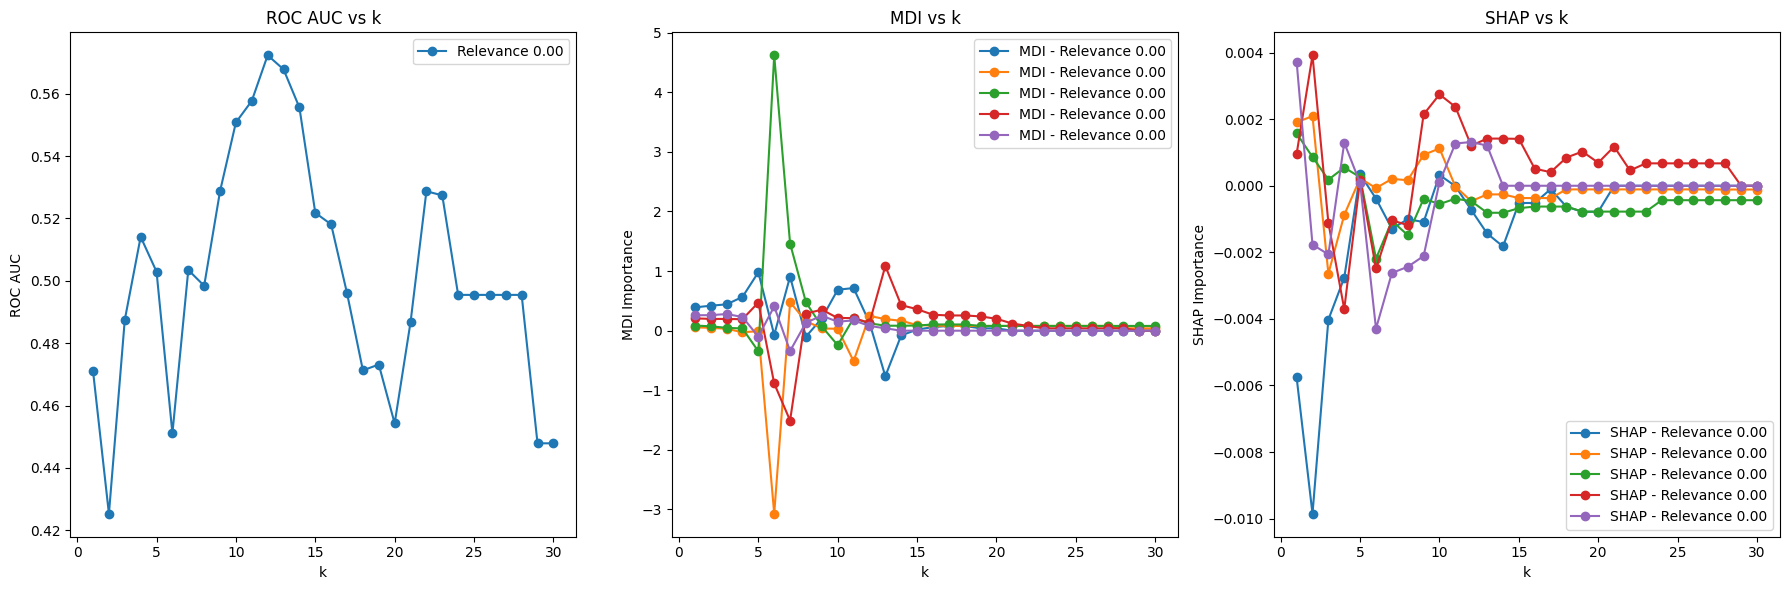

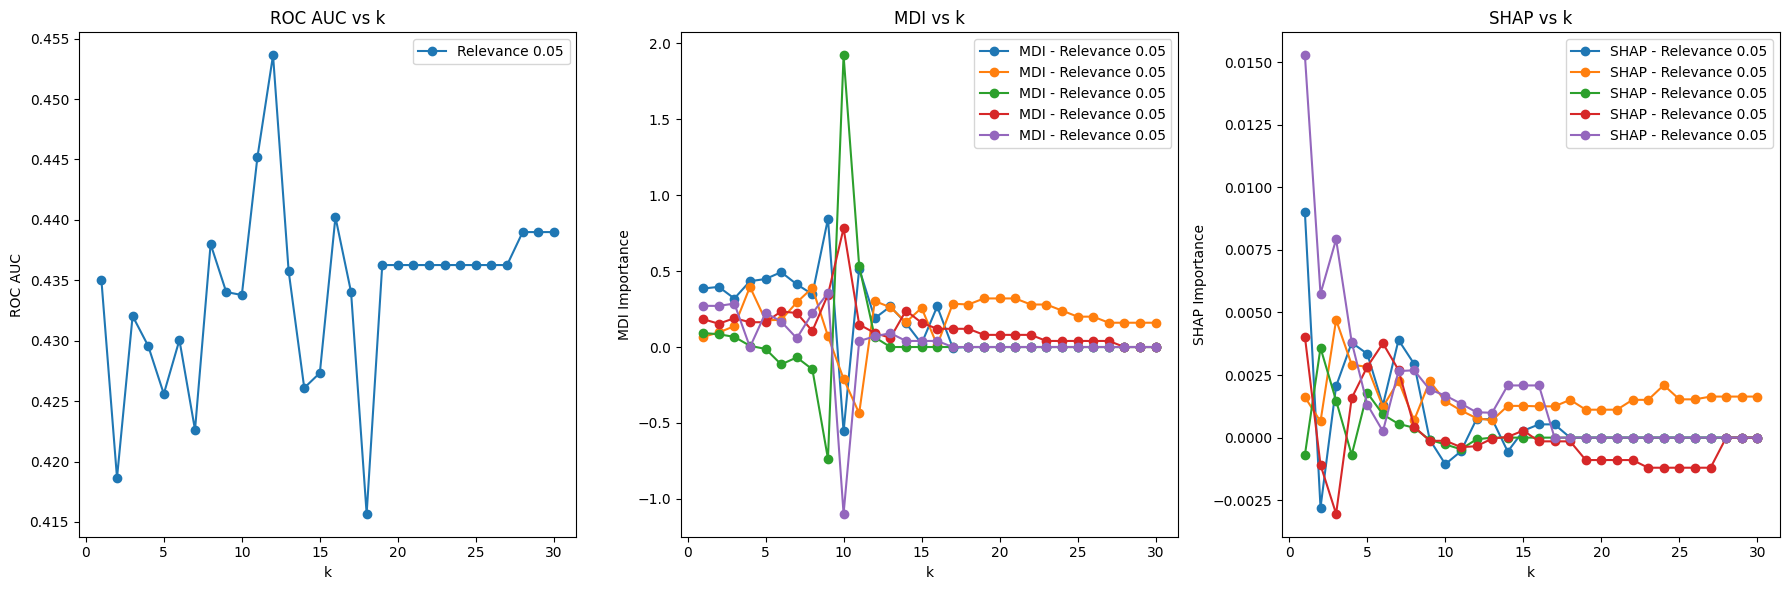

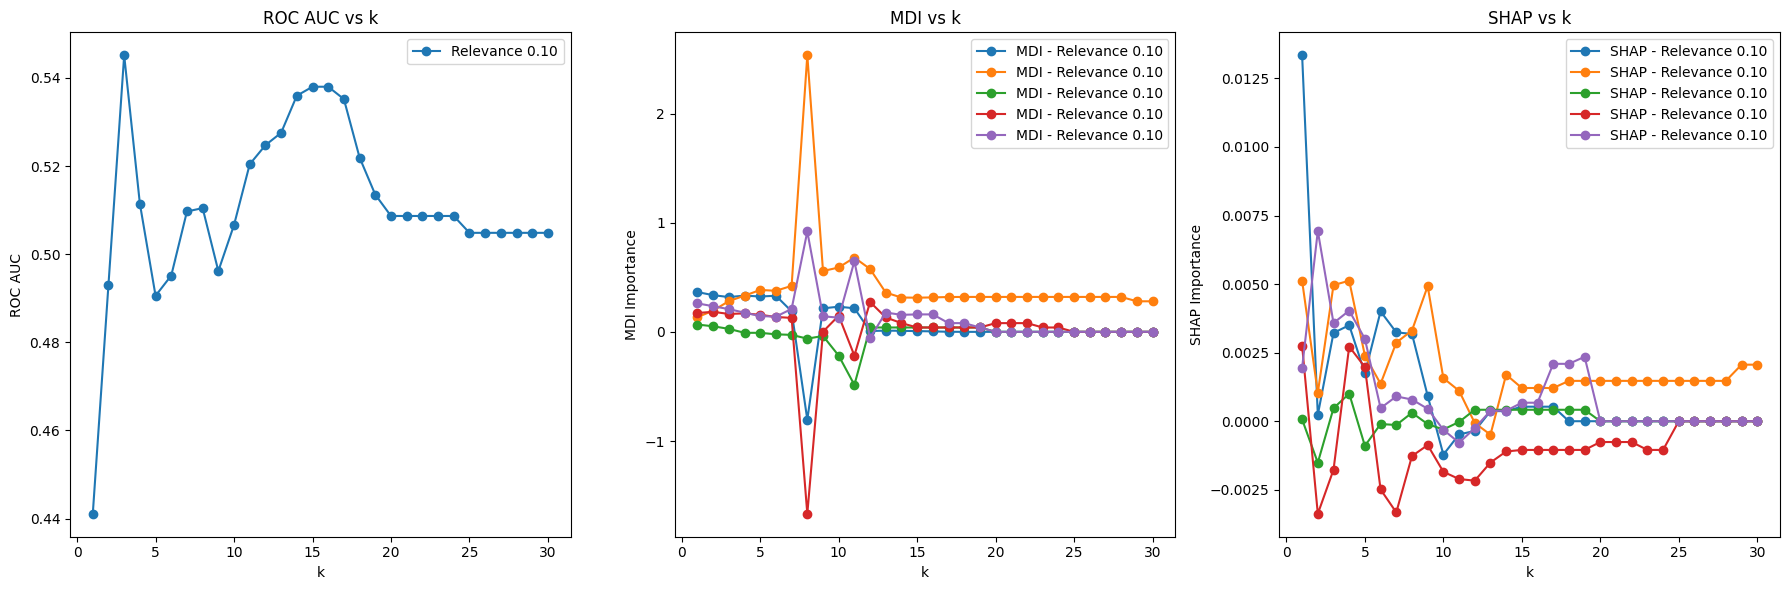

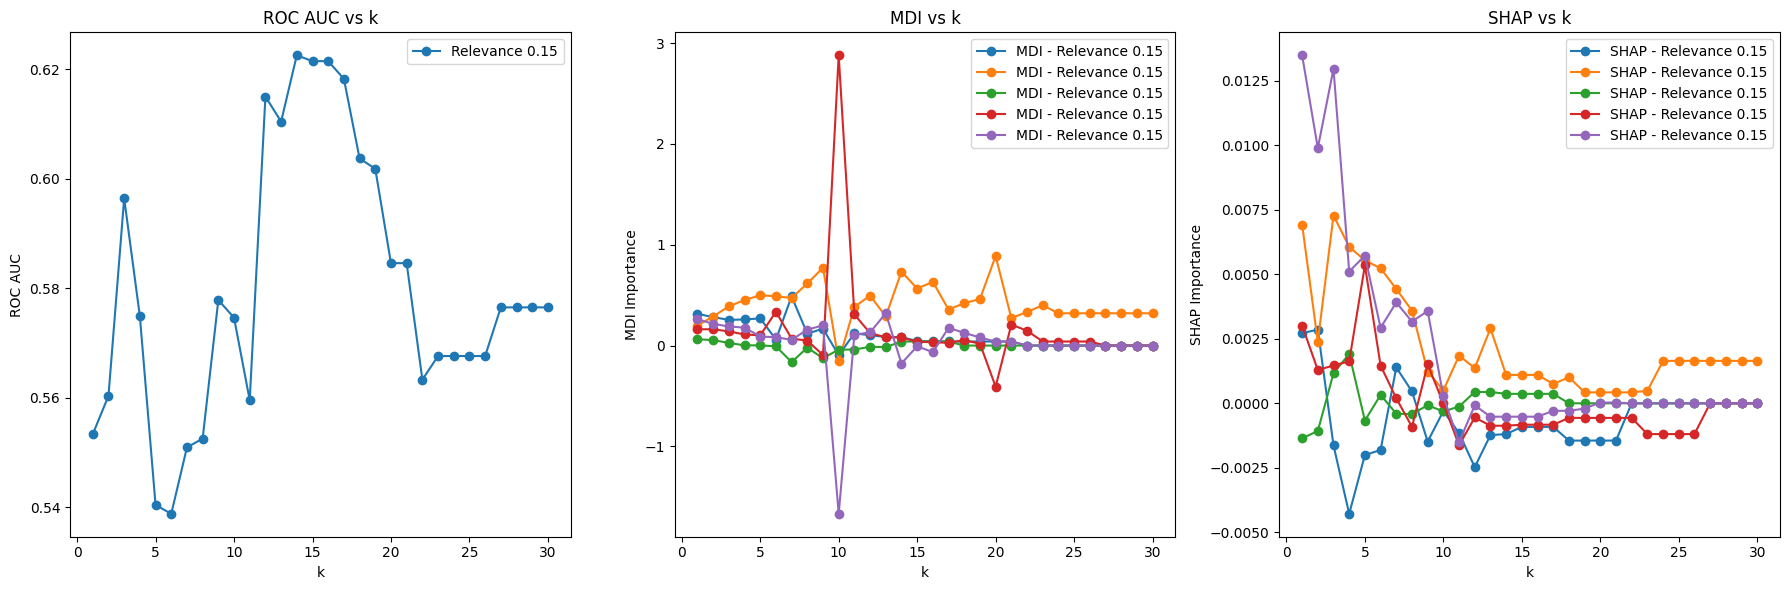

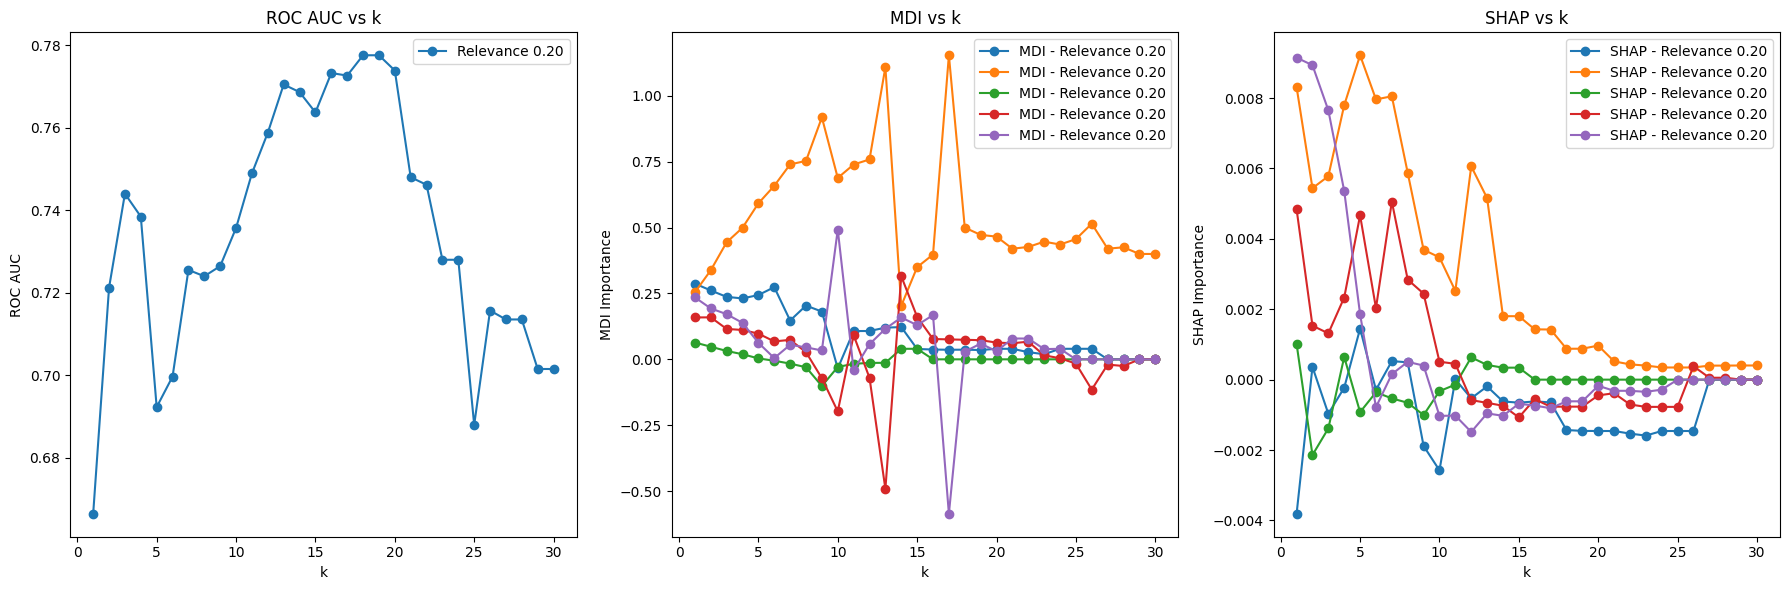

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from TreeModelsFromScratch.RandomForest import RandomForest
from utils import simulate_data_strobl
from matplotlib import pyplot as plt

def calculate_auc_roc(y_true, y_scores):
    """Calculate the AUC-ROC score."""
    return roc_auc_score(y_true, y_scores)

def evaluate_models(X_train, y_train, X_test, y_test, k_values):
    """Evaluate RandomForest models for a range of k values and record MDI, SHAP, and ROC AUC."""
    results = []
    for k in k_values:
        model = RandomForest(treetype="classification", n_trees=25, k=k, random_state=42, oob_SHAP=True, depth_dof=True)
        model.fit(X_train, y_train)
        y_scores = model.predict_proba(X_test)[:, 1]
        roc_auc = calculate_auc_roc(y_test, y_scores)
        mdi_importances = model.feature_importances_
        shap_values = np.mean(model.oob_SHAP_values, axis=0)  # Average SHAP importance per feature

        results.append({
            'k': k,
            'roc_auc': roc_auc,
            'mdi_importances': mdi_importances,
            'shap_values': shap_values
        })
    return results

relevance_values = [0, 0.05, 0.1, 0.15, 0.2]
k_values = range(1, 31)
all_results = []

for relevance in relevance_values:
    X, y = simulate_data_strobl(n=300, relevance=relevance, seed=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = evaluate_models(X_train, y_train, X_test, y_test, k_values)
    all_results.append({'relevance': relevance, 'results': results})

for relevance_result in all_results:
    relevance = relevance_result['relevance']
    plt.figure(figsize=(18, 6))

    ks = [result['k'] for result in relevance_result['results']]
    rocs = [result['roc_auc'] for result in relevance_result['results']]
    mdi_means = [result['mdi_importances'] for result in relevance_result['results']]
    shap_means = [result['shap_values'] for result in relevance_result['results']]

    plt.subplot(1, 3, 1)
    plt.plot(ks, rocs, label=f'Relevance {relevance:.2f}', marker = "o")
    plt.title('ROC AUC vs k')
    plt.xlabel('k')
    plt.ylabel('ROC AUC')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(ks, mdi_means, label=f'MDI - Relevance {relevance:.2f}', marker = "o")
    plt.title('MDI vs k')
    plt.xlabel('k')
    plt.ylabel('MDI Importance')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(ks, shap_means, label=f'SHAP - Relevance {relevance:.2f}', marker = "o")
    plt.title('SHAP vs k')
    plt.xlabel('k')
    plt.ylabel('SHAP Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()